# Project: Wrangle and Analyze data from WeRateDogs

## Table of Contents

- [Introduction](#intro)
- [Data Wrangling](#wrangling)
    - [Data Gathering](#gathering)
    - [Data Assessing](#assessing)
    - [Data Cleaning](#cleaning)
- [Data Analysis](#analysis)
- [Conclusions](#conclusons)

<a id='intro'></a>
## Introduction

This project aims at wrangling Twitter data to create interesting and trustworthy analyses and visualizations. The dataset is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), aka WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings always have a denominator of 10, but the ratings are always greater than 10, i.e. 11/10, 12/10, 13/10, etc. 

<a id='wrangling'></a>
## Data Wrangling

First thing to do in this project is "Data Wrangling", which consists of "Data Gathering", "Data Assessing", and "Data Cleaning". Oftentimes, the raw data is rarely clean. Data wrangling is a process to prepare datasets for easy access and analysis.

<a id='gathering'></a>
### Data Gathering

Data needed for this project is gathered from three sources, including:
1. The WeRateDogs Twitter archive that is stored in a file called `'twitter-archive-enhanced.csv'`.
2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file is hosted on Udacity's servers and downloaded programmatically using the Requests library and the following URL: `https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv`.
3. Using the tweet IDs in the WeRateDogs Twitter archive in 1. to **query the Twitter API for each tweet's JSON data** using Python's [Tweepy library](http://www.tweepy.org/) and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file.

Three dataframes `df1`, `df2`, and `df3` are generated for data gathered from the three aforementioned sources, respectively.

Let's get started by importing necessary libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import requests
import io
import tweepy
import json

1. Create `df1` to store data from `'twitter-archive-enhanced.csv'`

In [2]:
# import 'twitter-archive-enhanced.csv' data
df1 = pd.read_csv('twitter-archive-enhanced.csv')
# see the first few rows of df1
df1.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
# check df1 info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Create `df2` to store data in `image-predictions.tsv` downloaded programmatically from url of the host's server.

In [4]:
# import 'image-predictions.tsv' data from url using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
data = r.content.decode('utf-8')
df2 = pd.read_csv(io.StringIO(data),sep='\t')
# see the first few rows of df2
df2.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [5]:
# check df1 info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. To query Twitter data, let's get started with creating an API object

In [6]:
# set access to tweepy api

consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Twitter's API has a rate limit. Rate limiting is used to control the rate of traffic sent or received by a server. Instead of getting tweet status one by one using `api.get_status()`, optionally, `api.statuses_lookup()` to get a chunk of 100 tweets at time may come in handy. **This may save a lot of running time!**

After querying each chunk of tweet ids, write returned tweet's JSON data to `tweet_json.txt` file with each JSON data on its own line.

In [7]:
# query twitter's API using tweetpy
tweet_ids = df1.tweet_id.values
i = 0
with open('tweet_json.txt', 'w') as outfile:
    # request 100 tweet ids at a time
    while i in range(len(tweet_ids)):
        if (i+100)<len(tweet_ids):
            id_list = tweet_ids[i:i+100]
            i += 100
        # last request
        else:
            id_list = tweet_ids[i:len(tweet_ids)]
            i = len(tweet_ids)
        try:
            id_list = list(id_list)
            tweet_list = api.statuses_lookup(id_list, tweet_mode='extended')
            # print number of ids successfully requsted
            print(str(i)+" ids success")
            # write tweet on 'tweet_json.txt' one by one
            for tweet in tweet_list:
                json.dump(tweet._json, outfile)
                outfile.write('\n')
        except tweepy.TweepError:
            print("Fail")
            pass

100 ids success
200 ids success
300 ids success
400 ids success
500 ids success
600 ids success
700 ids success
800 ids success
900 ids success
1000 ids success
1100 ids success
1200 ids success
1300 ids success
1400 ids success
1500 ids success
1600 ids success
1700 ids success
1800 ids success
1900 ids success
2000 ids success
2100 ids success
2200 ids success
2300 ids success
2356 ids success


Read `tweet_json.txt` file line by line, to create a pandas DataFrame `df_api`

In [8]:
# load json data from 'tweet_json.txt'
data = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        data.append(json.loads(line))

In [9]:
# create dataframe from json data loaded just now
df_api = pd.DataFrame(data)
# see first few rows of df3
df_api.head(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Sun Jun 18 16:57:37 +0000 2017,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876484043352588288, 'id_str'...",18239,False,This is Benedict. He wants to thank you for th...,None,...,NaN,NaN,NaN,NaN,2314,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Sat Jul 15 23:25:31 +0000 2017,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 886366138128449536, 'id_str'...",20534,False,This is Roscoe. Another pupper fallen victim t...,None,...,NaN,NaN,NaN,NaN,3084,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Wed Jun 21 19:36:23 +0000 2017,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,False,RT @rachel2195: @dog_rates the boyfriend and h...,None,...,NaN,NaN,NaN,NaN,78,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Thu Jul 20 16:49:33 +0000 2017,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 888078426338406400, 'id_str'...",21108,False,This is Gerald. He was just told he didn't get...,None,...,NaN,NaN,NaN,NaN,3360,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40853,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8330,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Tue Jun 27 00:10:17 +0000 2017,"[0, 90]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 879492035853660161, 'id_str'...",22755,False,This is Bailey. He thinks you should measure e...,None,...,NaN,NaN,NaN,NaN,3075,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Sat Jun 24 13:24:20 +0000 2017,"[0, 45]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,29333,False,Martha is stunning how h*ckin dare you. 13/10 ...,None,...,{'created_at': 'Sat Jun 24 13:05:06 +0000 2017...,8.785999e+17,878599868507402241,"{'url': 'https://t.co/9uABQXgjwa', 'expanded':...",6955,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Tue Jun 27 12:14:36 +0000 2017,"[16, 31]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,302,False,@RealKentMurphy 14/10 confirmed,None,...,NaN,NaN,NaN,NaN,10,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Tue Jul 11 20:47:12 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 884876742820859904, 'id_str'...",27054,False,This is Lola. It's her first time outside. Mus...,None,...,NaN,NaN,NaN,NaN,5415,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Thu Jul 06 15:58:11 +0000 2017,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 882992072327913472, 'id_str'...",23216,False,This is Rusty. He wasn't ready for the first p...,None,...,NaN,NaN,NaN,NaN,3782,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': 

In [10]:
# check df3 info
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 31 columns):
contributors                 0 non-null object
coordinates                  0 non-null object
created_at                   2337 non-null object
display_text_range           2337 non-null object
entities                     2337 non-null object
extended_entities            2065 non-null object
favorite_count               2337 non-null int64
favorited                    2337 non-null bool
full_text                    2337 non-null object
geo                          0 non-null object
id                           2337 non-null int64
id_str                       2337 non-null object
in_reply_to_screen_name      77 non-null object
in_reply_to_status_id        77 non-null float64
in_reply_to_status_id_str    77 non-null object
in_reply_to_user_id          77 non-null float64
in_reply_to_user_id_str      77 non-null object
is_quote_status              2337 non-null bool
lang            

`df_api` contains 2337 entries out of 2356 entries in `df`. This is becuase a few tweet IDs in the archive may have been deleted. Let's just briefly check which tweet IDs are missing.

In [11]:
# store missing ids that failed to request api
missing_ids = []
for id in list(tweet_ids):
    if id in list(df_api.id):
        pass
    else:
        missing_ids.append(id)

missing_ids

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288]

In [12]:
# cross check the number of missing data is correct. This should return True
len(missing_ids)+len(df_api.id) == len(tweet_ids)

True

Let's also get image url of each tweet. The url can be extracted by parsing `entities`, `media`, and `media url` objects.

In [13]:
# get image urls from entities
urls = []
for entity in df_api.entities:
    try:
        urls.append(entity['media'][0]['media_url'])
    except:
        urls.append(np.nan)
        pass

In [14]:
# assign urls to new column 'image_url' in df_api
df_api['image_url'] = urls

Finally, create `df3` that stores only variables of interest from `df_api`.

In [15]:
# create new dataframe with necessary columns
columns = ['id','retweet_count','favorite_count','lang','image_url']
df3 = df_api[columns]
# see first few rows of df3
df3.head(10)

,id,retweet_count,favorite_count,lang,image_url
0,876484053909872640,2314,18239,en,http://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg
1,886366144734445568,3084,20534,en,http://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg
2,877611172832227328,78,0,en,http://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg
3,888078434458587136,3360,21108,en,http://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg
4,891689557279858688,8330,40853,en,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
5,879492040517615616,3075,22755,en,http://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg
6,878604707211726852,6955,29333,en,NaN
7,879674319642796034,10,302,en,NaN
8,884876753390489601,5415,27054,en,http://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg
9,882992080364220416,3782,23216,en,http://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg


In [16]:
# check df3 info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 5 columns):
id                2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
lang              2337 non-null object
image_url         2065 non-null object
dtypes: int64(3), object(2)
memory usage: 91.4+ KB


<a id='assessing'></a>
### Data Assessing

Before cleaning, it is essential to assess data to inspect what to clean. In this process, two issues are concerned:

- data quality issue
- data tidiness issue

The assessment can be done visually and programatically.

First, visual assessment is performed by looking through each table `df1`, `df2`, and `df3`. Then, use `df.info()` to programatically assess datatypes of each variables. Check if there is duplicated tweet by `df.duplicated()`. Use `series.value_counts()` for some variables to see their values and counts.

In [17]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
# should return 0 if no duplicates
df1.tweet_id.duplicated().sum()

0

- rows that have non-empty `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` should be removed.
- link tags appear in values of source column
- more than one expanded urls
- when ratings numerator has decimals, only decimals were extracted (e.g. row 45, 695, 763)
- 'a' should not be a name (row 55, 1002, 1004, 1017, 1049, 1340, 1351,...)
- 'not' should not be a name (row 335)
- 'this' should not be a name (row 1120)
- 'unacceptable' shouuld not be name (row 1121)
- wrong extracted ratings (row 313, 784, 1165, 1202, 2335)
- `tweet_id`, `in_reply_to_status_id` and other ids should be string type.
- `timestamp` should be datetime type.
- `rating_numerator` and `rating_denominator` should be float.
- `doggo`, `floofer`, `pupper`, and `puppo` should be values of variable `dog_stage`

In [20]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# should return 0 if no duplicates
df2.tweet_id.duplicated().sum()

0

- `tweet_id` should be string type.
- `p1`, `p2`, and `p3` should be category type.

In [23]:
df3

,id,retweet_count,favorite_count,lang,image_url
0,876484053909872640,2314,18239,en,http://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg
1,886366144734445568,3084,20534,en,http://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg
2,877611172832227328,78,0,en,http://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg
3,888078434458587136,3360,21108,en,http://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg
4,891689557279858688,8330,40853,en,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
5,879492040517615616,3075,22755,en,http://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg
6,878604707211726852,6955,29333,en,NaN
7,879674319642796034,10,302,en,NaN
8,884876753390489601,5415,27054,en,http://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg
9,882992080364220416,3782,23216,en,http://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 5 columns):
id                2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
lang              2337 non-null object
image_url         2065 non-null object
dtypes: int64(3), object(2)
memory usage: 91.4+ KB


In [25]:
# should return 0 if no duplicates
df3.id.duplicated().sum()

0

In [26]:
# see values in 'lang' column
df3.lang.value_counts()

en     2319
und       7
in        3
nl        3
es        1
tl        1
eu        1
ro        1
et        1
Name: lang, dtype: int64

- `id` should be changed to `tweet_id` and type should be string.
- `lang` should be category type.
- `lang` column's name and values's names are not descriptive.

Let's summarize issues that found in each table into two issues: **quality** or **tidiness**.

#### Quality
##### `df1` table
- rows that have non-empty `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` should be removed.
- link tags appear in values of source column
- more than one expanded urls
- when ratings numerator has decimals, only decimals were extracted (e.g. row 45, 695, 763)
- 'a' should not be a name (row 55, 1002, 1004, 1017, 1049, 1340, 1351,...)
- 'not' should not be a name (row 335)
- 'this' should not be a name (row 1120)
- 'unacceptable' shouuld not be name (row 1121)
- wrong extracted ratings (row 313, 784, 1165, 1202, 2335)
- `tweet_id`, `in_reply_to_status_id` and other ids should be string type.
- `timestamp` should be datetime type.
- `rating_numerator` and `rating_denominator` should be float.

##### `df2` table
- `tweet_id` should be string type.
- `p1`, `p2`, and `p3` should be category type.

##### `df3` table
- `id` should be changed to `tweet_id` and type should be string.
- `lang` should be category type.
- `lang` column's name and values's names are not descriptive.

#### all tables
- unnecessary columns should be dropped.

#### Tidiness
- `doggo`, `floofer`, `pupper`, and `puppo` in `df1` should be values of variable `dog_stage`.
- `df1`, `df2`, and `df3` should be combined into one table.

<a id='cleaning'></a>
### Data Cleaning

Prior to cleaning, make a copy of `df1`, `df2`, and `df3`.

In [27]:
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()

#### Quality

##### `df1` table
- rows that have non-empty `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` should be removed.

#### Define

Find non-empty rows and drop them out

#### Code

In [28]:
# find non-empty rows from 'retweet_status_id'
non_empty = ~df1_copy.retweeted_status_id.isnull()
# drop the rows using index
df1_copy.drop(df1_copy.index[non_empty],inplace=True)

#### Test

In [29]:
# Check that only empty values inside 
#'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
# this should return (0,0,0)
df1_copy.retweeted_status_id.count(),df1_copy.retweeted_status_user_id.count(),df1_copy.retweeted_status_timestamp.count()

(0, 0, 0)

##### `df1` table
- link tags appear in values of source column

#### Define

Extract only text inside html element.

#### Code

In [30]:
# use str.extract() and regular expression to extract test inside html element
df1_copy.source = df1_copy.source.str.extract(r'>([\w\s-]+)<')

#### Test

In [31]:
# check if all the values in source is correct
df1_copy.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

##### `df1` table
- more than one expanded urls

#### Define

Split each url using comma and keep only the first url

#### Code

In [32]:
# new column 'expanded_url' to store the first url from 'expanded_urls'
df1_copy['expanded_url'] = df1_copy.expanded_urls.str.split(pat=',', expand=True)[0]

#### Test

In [33]:
# setting for fully display values
pd.set_option('display.max_colwidth', -1)
# see first few rows to check if 'expanded_url' was generated and stored values correctly
df1_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://twitter.com/dog_rates/status/891327558926688256/photo/1


##### `df1` table
- when ratings numerator has decimals, only decimals were extracted (e.g. row 45, 695, 763)

#### Define

Search for ratings with decimals in the dataset. Correct the values.

#### Code

In [34]:
# Search for the string in the text, whose rating's format contains decimals
index = df1_copy.text.str.contains('\d\.\d\d?/\d')
df1_copy.loc[index][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [35]:
# Correct the rating_numerator values
extract = df1_copy.loc[index,'text'].str.extract(r'(\d?\d\.\d\d?)/\d')[0]
df1_copy.loc[index,'rating_numerator'] = extract

#### Test

In [36]:
# Check if the values were revised
df1_copy.loc[index][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


##### `df1` table
- 'a' should not be a name (row 55, 1002, 1004, 1017, 1049, 1340, 1351,...)
- 'not' should not be a name (row 335)
- 'this' should not be a name (row 1120)
- 'unacceptable' should not be name (row 1121)

It is noticable that these names begin with a lowercase letter. It may be useful to lookup the names with this condition first.

#### Define

Filter invalid names and turn them into None.

#### Code

In [37]:
## filter the invalid names and replace with 'None'
df1_copy.loc[df1_copy.name == df1_copy.name.str.lower(),'name'] = 'None'

#### Test

In [38]:
## Check the values in column 'name' if no invalid names(begin with lowercase) remain. This should return zero,
df1_copy.name.str.islower().sum()

0

##### `df1` table
- wrong extracted ratings (row 313, 784, 1165, 1202, 2335)

It is noticable that these ratings have denominator other than 10. It should be a good idea filter data with this condition and compare comlumn 'text' with 'rating_numerator' and 'rating_denominator'.

#### Define

Filter rows with `rating_denominator` other than 10 and check the correctness. Revise the ratings that are wrong.

#### Code

In [39]:
# filter 'rating_dominator' other than 10
df1_copy[df1_copy.rating_denominator != 10][['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


From visually assessing the data again, it can be seen that:

- incorrect ratings are on in tweet_id 835246439529840640, 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296
- no ratings for tweet_id 832088576586297345, 810984652412424192. These should be replaced with NaN.
- the other rows are already correct.

It is noticable that incorrect ratings are caused by the other similar number format (e.g. dates, 7/11). The correct ratings are usually a second element of the same number formatted elements.

In [40]:
# define function to return index of values that are in the list
def index(series, _list):
    index = []
    for s in series:
        index.append(s in _list)
    return index

In [41]:
# find rows that tweet_id are incorrect
incorrect_list = [835246439529840640, 740373189193256964, 722974582966214656, 716439118184652801, 
                  682962037429899265, 666287406224695296]
index_in = index(df1_copy.tweet_id,incorrect_list)

In [42]:
# split 'text' by '/'. 
# The last string of the second element is numerator.
# The first string of the thrid element is denominator.
numer = df1_copy[index_in].text.str.split(pat='/',expand=True)[1].str.extract(r'\d+.+([\d\s]\d)')
denom = df1_copy[index_in].text.str.split(pat='/',expand=True)[2].str.extract(r'(\d+).*')
# replace wrong rating with the correct ones
df1_copy.loc[df1_copy.index[index_in],'rating_numerator'] = numer[0]
df1_copy.loc[df1_copy.index[index_in],'rating_denominator'] = denom[0]


In [43]:
# find rows that tweet_id have no ratings
norating_list = [832088576586297345, 810984652412424192]
index_no = index(df1_copy.tweet_id,norating_list)

In [44]:
# replace non-rating rows with NaN
df1_copy.loc[df1_copy.index[index_no],'rating_numerator'] = np.nan
df1_copy.loc[df1_copy.index[index_no],'rating_denominator'] = np.nan

#### Test

In [45]:
# check if wrong ratings were revised
df1_copy[index_in][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13,10
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10


In [46]:
# check if ratings in non-rating rows were replaced
df1_copy[index_no][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,NaN,NaN
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN


##### `df1` table
- `tweet_id`, `in_reply_to_status_id` and other ids should be string type.
- `timestamp` should be datetime type.
- `rating_numerator` and `rating_denominator` should be float.

##### `df2` table
- `tweet_id` should be string type.

##### `df3` table
- `id` should be changed to `tweet_id` and type should be string.
- `lang` should be category type.

#### Define
Convert type of variables into correct types.

#### Code

In [47]:
# df1
df1_copy.tweet_id = df1_copy.tweet_id.astype(str)
df1_copy.in_reply_to_status_id = df1_copy.in_reply_to_status_id.astype(str)
df1_copy.in_reply_to_user_id = df1_copy.in_reply_to_user_id.astype(str)
df1_copy.retweeted_status_id = df1_copy.retweeted_status_id.astype(str)
df1_copy.retweeted_status_user_id = df1_copy.retweeted_status_user_id.astype(str)
df1_copy.timestamp = pd.to_datetime(df1_copy.timestamp)
df1_copy.rating_numerator = df1_copy.rating_numerator.astype(float)
df1_copy.rating_denominator = df1_copy.rating_denominator.astype(float)

# df2
df2_copy.tweet_id = df2_copy.tweet_id.astype(str)

# df3
df3_copy.id = df3_copy.id.astype(str)
df3_copy.lang = df3_copy.lang.astype('category')

#### Test

In [48]:
# check datatype of df1
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2173 non-null float64
rating_denominator            2173 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
expanded_url       

In [49]:
# check datatype of df2
df2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [50]:
# check datatype of df3
df3_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 5 columns):
id                2337 non-null object
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
lang              2337 non-null category
image_url         2065 non-null object
dtypes: category(1), int64(2), object(2)
memory usage: 75.8+ KB


##### `df3` table
- `lang` column's name and values's names are not descriptive.

#### Define

Rename `lang` column to `language` and map undescriptive values with descriptive names. 

Ref. http://support.gnip.com/apis/powertrack2.0/rules.html#Operators

#### Code

In [51]:
# rename the column 'lang'
df3_copy.rename(columns={'lang':'language'},inplace=True)

# map undescriptive names with descriptive ones
map_dict = {'en':'English','und':'Undefined','nl':'Dutch',
            'in':'Indonesian','tl':'Tagalog','ro':'Romanian',
            'eu': 'Undefined','et':'Estonian','es':'Spansih'}
df3_copy.language = df3_copy.language.map(map_dict)

#### Test

In [52]:
# Check if column name was renamed
df3_copy.columns

Index(['id', 'retweet_count', 'favorite_count', 'language', 'image_url'], dtype='object')

In [53]:
# Check if language values were changed
df3_copy.language.value_counts()

English       2319
Undefined     8   
Indonesian    3   
Dutch         3   
Estonian      1   
Spansih       1   
Romanian      1   
Tagalog       1   
Name: language, dtype: int64

#### Tidiness

- `doggo`, `floofer`, `pupper`, and `puppo` in `df1` should be values of variable `dog_stage`.

#### Define

Create new column `dog_stage` containing either `doggo`, `floofer`,`pupper`,`puppo`, or the combination of these values.

#### Code

In [54]:
# create 'dog_stage' column that contain values from 'doggo','floofer','pupper','puppo' separated by comma
df1_copy['dog_stage'] = df1_copy.doggo + ',' + df1_copy.floofer + ',' + df1_copy.pupper + ',' + df1_copy.puppo
# clean the values in dog_stage by removing 'None' and comma if unnecessary
df1_copy['dog_stage'] = df1_copy.dog_stage.str.replace(',None','',regex=False).str.replace('None,','',regex=False).\
str.replace('None','',regex=False)
# fill empty string with NaN
df1_copy.loc[df1_copy['dog_stage']=='','dog_stage'] = np.nan

#### Test

In [55]:
# See values in 'dog_stage'
df1_copy['dog_stage'].value_counts()

pupper           224
doggo            75 
puppo            24 
doggo,pupper     10 
floofer          9  
doggo,puppo      1  
doggo,floofer    1  
Name: dog_stage, dtype: int64

- `df1`, `df2`, and `df3` should be combined into one table.

#### Define

Merge `df1`, `df2`, and `df3` together on `tweet_id` and `id`.

#### Code

In [56]:
# merge df2 on 'tweet_id' to df1
df_clean = df1_copy.merge(df2_copy,how='left',on='tweet_id')
# merge df3 on 'id' to 'df_clean' on 'tweet_id'
df_clean = df_clean.merge(df3_copy,how='left',left_on='tweet_id',right_on='id')

#### Test

In [57]:
# see the first few rows of df_clean
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,language,image_url
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.085851,False,banana,0.076110,False,892420643555336193,8178.0,37522.0,English,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.090647,True,papillon,0.068957,True,892177421306343426,6053.0,32252.0,English,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.078253,True,kelpie,0.031379,True,891815181378084864,4004.0,24302.0,English,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.168086,True,spatula,0.040836,False,891689557279858688,8330.0,40853.0,English,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,9028.0,39064.0,English,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg


In [58]:
# see df_clean info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 35 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2173 non-null float64
rating_denominator            2173 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
expanded_url       

At last,

- unnecessary columns should be dropped.

#### Define

Consider which columns should be dropped and drop them.

#### Code

In [59]:
# drop 'id' becuase it is similar to 'tweet_id'
df_clean.drop('id',axis=1,inplace=True)

In [60]:
# drop 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
# 'retweeted_status_timestamp', 'expanded_urls', 'doggo', 'floofer', 'pupper','puppo'
drop_column = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
              'retweeted_status_timestamp','expanded_urls', 'doggo', 'floofer', 'pupper','puppo']
df_clean.drop(drop_column,axis=1,inplace=True)

In [61]:
# check if any values in 'image_url' can fill missing values in 'jpg_url'
df_clean.loc[df_clean.jpg_url.isnull()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_url,dog_stage,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,language,image_url
29,886267009285017600,2017-07-15 16:51:35,Twitter for iPhone,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,12.0,10.0,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,116.0,English,NaN
33,885518971528720385,2017-07-13 15:19:09,Twitter for iPhone,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,14.0,10.0,None,https://twitter.com/4bonds2carbon/status/885517367337512960,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3612.0,19826.0,English,NaN
39,884247878851493888,2017-07-10 03:08:17,Twitter for iPhone,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,13.0,10.0,None,https://twitter.com/kaijohnson_19/status/883965650754039809,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19785.0,70749.0,English,NaN
52,881633300179243008,2017-07-02 21:58:53,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17.0,10.0,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,122.0,English,NaN
61,879674319642796034,2017-06-27 12:14:36,Twitter for iPhone,@RealKentMurphy 14/10 confirmed,14.0,10.0,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,302.0,English,NaN
68,878604707211726852,2017-06-24 13:24:20,Twitter for iPhone,Martha is stunning how h*ckin dare you. 13/10 https://t.co/9uABQXgjwa,13.0,10.0,None,https://twitter.com/bbcworld/status/878599868507402241,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6955.0,29333.0,English,NaN
76,876537666061221889,2017-06-18 20:30:39,Twitter for iPhone,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,14.0,10.0,None,https://twitter.com/mpstowerham/status/876162994446753793,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4493.0,22895.0,English,NaN
81,875097192612077568,2017-06-14 21:06:43,Twitter for iPhone,You'll get your package when that precious man is done appreciating the pups. 13/10 for everyone https://t.co/PFp4MghzBW,13.0,10.0,None,https://twitter.com/drboondoc/status/874413398133547008,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5873.0,26643.0,English,NaN
98,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14.0,10.0,None,https://twitter.com/animalcog/status/871075758080503809,doggo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5396.0,20459.0,English,NaN
101,870726314365509632,2017-06-02 19:38:25,Twitter for iPhone,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,10.0,10.0,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,118.0,English,NaN


It is found that no values in 'image_url' could fill missing values in 'jpg_url'. Therefore, 'image_url' should be dropped as well.

In [62]:
# drop 'image_url'
df_clean.drop('image_url',axis=1,inplace=True)

#### Test

In [63]:
# check the cleanliness of df_clean
df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_url,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,language
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,https://twitter.com/dog_rates/status/892420643555336193/photo/1,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,8178.0,37522.0,English
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,https://twitter.com/dog_rates/status/892177421306343426/photo/1,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6053.0,32252.0,English
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,https://twitter.com/dog_rates/status/891815181378084864/photo/1,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,4004.0,24302.0,English
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,https://twitter.com/dog_rates/status/891689557279858688/photo/1,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8330.0,40853.0,English
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,https://twitter.com/dog_rates/status/891327558926688256/photo/1,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9028.0,39064.0,English


In [64]:
# check df_clean info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  2175 non-null object
expanded_url          2117 non-null object
dog_stage             344 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_count       

In [65]:
# Save df_clean to 'twitter_archive_master.csv' file
df_clean.to_csv('twitter_archive_master.csv',index=False)

<a id='analysis'></a>
## Data Analysis

The uniqueness of WeRateDogs' rating system is that numerators are often larger than denominators. Can the rating even tell how popular each dog is?! In this part, let's find some interesting insights from this fun dataset. 

Sometimes, the denominators are not even 10. So it should be a good idea to define the rating as the numerator divided by the denominator.

In [66]:
# Load clean data for analysis
df = pd.read_csv('twitter_archive_master.csv')

# Create 'rating' column containing values of numerators divided by denominators
df['rating'] = df.rating_numerator/df.rating_denominator

# See first few columns of df
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_url,dog_stage,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,language,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,https://twitter.com/dog_rates/status/892420643555336193/photo/1,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,bagel,0.085851,False,banana,0.076110,False,8178.0,37522.0,English,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,https://twitter.com/dog_rates/status/892177421306343426/photo/1,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Pekinese,0.090647,True,papillon,0.068957,True,6053.0,32252.0,English,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,https://twitter.com/dog_rates/status/891815181378084864/photo/1,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,malamute,0.078253,True,kelpie,0.031379,True,4004.0,24302.0,English,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,https://twitter.com/dog_rates/status/891689557279858688/photo/1,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8330.0,40853.0,English,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,https://twitter.com/dog_rates/status/891327558926688256/photo/1,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9028.0,39064.0,English,1.2


### Question 1

**First, it is questionable that the rating system is only for fun or it can really be a measurement for the dogs' popularity. Numbers of retweet and favorite should reflect more realistic popularity than the ratings. Let's see how the rating actually is when comparing with numbers of retweet and favorite!**

In [67]:
# Create dataframe for this analysis
df_q1 = df[['rating','retweet_count','favorite_count']]

# Drop rows with missing values
df_q1 = df_q1.dropna()

In [68]:
# See statistic of df_anal1
df_q1.describe()

,rating,retweet_count,favorite_count
count,2169.000000,2169.000000,2169.000000
mean,1.220045,2596.054864,8442.440756
std,4.249835,4612.684758,12408.300148
min,0.000000,1.000000,51.000000
25%,1.000000,559.000000,1799.000000
50%,1.100000,1241.000000,3810.000000
75%,1.200000,2950.000000,10508.000000
max,177.600000,82375.000000,162061.000000


These three variables have a large difference of mean values. [Feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) is used here to standardize the values in a range of \[0,1\].

In [69]:
# Feature scale the values three variables.
df_q1['scaled_rating'] = (df_q1.rating-df_q1.rating.min())/(df_q1.rating.max()-df_q1.rating.min())
df_q1['scaled_retweet'] = (df_q1.retweet_count-df_q1.retweet_count.min())/(df_q1.retweet_count.max()-df_q1.retweet_count.min())
df_q1['scaled_favorite'] = (df_q1.favorite_count-df_q1.favorite_count.min())/(df_q1.favorite_count.max()-df_q1.favorite_count.min())


In [70]:
# Check if scaled values are in a [0,1] range
df_q1.describe()

,rating,retweet_count,favorite_count,scaled_rating,scaled_retweet,scaled_favorite
count,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000
mean,1.220045,2596.054864,8442.440756,0.006870,0.031503,0.051796
std,4.249835,4612.684758,12408.300148,0.023929,0.055997,0.076590
min,0.000000,1.000000,51.000000,0.000000,0.000000,0.000000
25%,1.000000,559.000000,1799.000000,0.005631,0.006774,0.010789
50%,1.100000,1241.000000,3810.000000,0.006194,0.015053,0.023202
75%,1.200000,2950.000000,10508.000000,0.006757,0.035800,0.064545
max,177.600000,82375.000000,162061.000000,1.000000,1.000000,1.000000


In [71]:
# import libralies for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

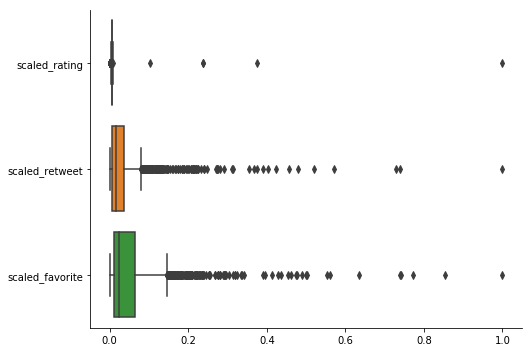

In [72]:
# create boxplot to see the distribution
sns.catplot(data=df_q1[['scaled_rating','scaled_retweet','scaled_favorite']], orient="h", kind="box", aspect=1.5);

The distribution of all of measurement is highly right-skewed. Let's remove outliers on the right, which are the values higher than 1.5*interquartile (IQR) from quartile3 (Q3). Although this approach of removing outliers is used in normal-distributed data, let's just simply use this way for the approximation.

In [73]:
# IQR = Q3 - Q1
IQR_rating = df_q1.scaled_rating.quantile(0.75) - df_q1.scaled_rating.quantile(0.25)
IQR_retweet = df_q1.scaled_retweet.quantile(0.75) - df_q1.scaled_retweet.quantile(0.25)
IQR_favorite = df_q1.scaled_favorite.quantile(0.75) - df_q1.scaled_favorite.quantile(0.25)

# threshold = Q3 + 1.5*IQR
out_rating =  df_q1.scaled_rating.quantile(0.75)+ 1.5*IQR_rating
out_retweet = df_q1.scaled_retweet.quantile(0.75) + 1.5*IQR_retweet
out_favorite = df_q1.scaled_favorite.quantile(0.75) + 1.5*IQR_favorite


In [74]:
# replace outliers with NaN
df_q1.loc[df_q1.scaled_rating>out_rating,'scaled_rating'] = np.nan
df_q1.loc[df_q1.scaled_retweet>out_retweet,'scaled_retweet'] = np.nan
df_q1.loc[df_q1.scaled_favorite>out_favorite,'scaled_favorite'] = np.nan

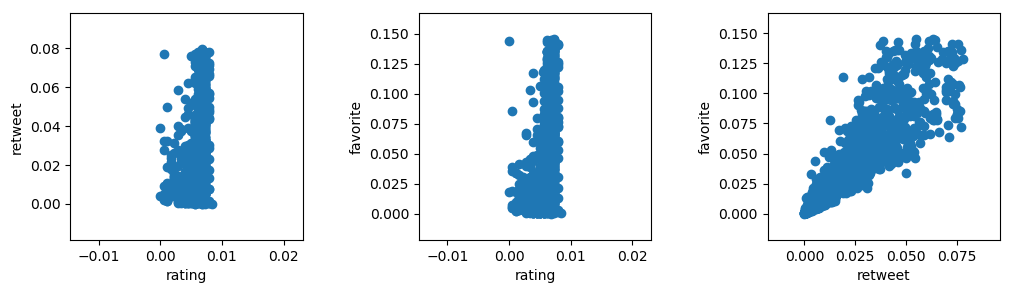

In [75]:
# Plot rating against numbers of retweet and favorite
f = plt.figure(figsize=(12,3),dpi=100)
plt.subplots_adjust(wspace=0.5)
ax1 = f.add_subplot(131)
plt.scatter(df_q1['scaled_rating'],df_q1['scaled_retweet'])
plt.xlabel('rating')
plt.ylabel('retweet')
ax2 = f.add_subplot(132)
plt.scatter(df_q1['scaled_rating'],df_q1['scaled_favorite'])
plt.xlabel('rating')
plt.ylabel('favorite')
ax3 = f.add_subplot(133)
plt.scatter(df_q1['scaled_retweet'],df_q1['scaled_favorite'])
plt.xlabel('retweet')
plt.ylabel('favorite')
plt.show()

**The first two scatterplots reveal that there is no correlation between rating and retweet count nor favorite count. Thus, we can confirm that WeRateDog rates dogs just for fun. The rating should not be the measurement to evaluate the popularity of dogs.**

**In addition, positive correlation can be seen from the last scatter plot. That is, either retweet_count or favorite_count would give similar interpretation when using them to measure the popularity of the dogs**

### Question 2

**So what the ratings tell? Most of the rating numerator is larger than the denominator. What makes WeRateDog do it this way?**

Let's divide rating into two groups:

- rating_numerator less than 10
- rating_numerator greater or equal to 10

In [76]:
# create new dataframe for each group
df_q21 = df.loc[df.rating_numerator<10]
df_q22 = df.loc[df.rating_numerator>=10]

It maybe a good idea to see the content of each group. 

In [77]:
df_q21

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_url,dog_stage,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,language,rating
197,848212111729840128,2017-04-01 16:35:01,Twitter for iPhone,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6.00,10.0,Jerry,https://twitter.com/dog_rates/status/848212111729840128/photo/1,NaN,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,...,Ibizan_hound,0.245797,True,wallaby,0.131647,False,3181.0,16682.0,English,0.600
265,835152434251116546,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0.00,10.0,None,https://twitter.com/dog_rates/status/835152434251116546/photo/1,NaN,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,...,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,3197.0,23288.0,English,0.000
326,826598799820865537,2017-02-01 01:11:25,Twitter for iPhone,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7.00,10.0,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,268.0,5333.0,English,0.700
558,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0,Logan,https://twitter.com/dog_rates/status/786709082849828864/photo/1,NaN,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,...,Persian_cat,0.122978,False,chow,0.102654,True,6571.0,19204.0,English,0.975
590,781661882474196992,2016-09-30 01:08:10,Twitter for iPhone,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5.00,10.0,None,https://twitter.com/dog_rates/status/781661882474196992/photo/1,NaN,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,...,golden_retriever,0.226954,True,collie,0.070652,True,2913.0,10986.0,English,0.500
618,777885040357281792,2016-09-19 15:00:20,Twitter for iPhone,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3.00,10.0,Wesley,https://twitter.com/dog_rates/status/777885040357281792/photo/1,NaN,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,...,basset,0.119682,True,Siberian_husky,0.108709,True,1763.0,6691.0,English,0.300
659,771014301343748096,2016-08-31 15:58:28,Twitter for iPhone,Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd,7.00,10.0,None,https://twitter.com/dog_rates/status/771014301343748096/photo/1,NaN,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,...,doormat,0.111790,False,macaque,0.088925,False,1755.0,7190.0,English,0.700
674,768193404517830656,2016-08-23 21:09:14,Twitter for iPhone,Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq,8.00,10.0,Gerald,https://twitter.com/dog_rates/status/768193404517830656/photo/1,doggo,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,...,ram,0.300851,False,cheetah,0.094474,False,3791.0,11414.0,English,0.800
683,766423258543644672,2016-08-18 23:55:18,Twitter for iPhone,This is Shadoe. Her tongue flies out of her mouth at random. Can't have a serious conversation with her. 9/10 https://t.co/Tytt15VquG,9.00,10.0,Shadoe,https://twitter.com/dog_rates/status/766423258543644672/photo/1,NaN,https://pbs.twimg.com/media/CqLh4yJWcAAHomv.jpg,...,Pomeranian,0.003897,True,Norwegian_elkhound,0.000253,True,1701.0,6298.0,English,0.900
696,763183847194451968,2016-08-10 01:23:03,Twitter for iPhone,This is Clark. He collects teddy bears. It's absolutely h*ckin horrifying. 8/10 please stop this Clark https://t.co/EDMcwt86fU,8.00,10.0,Clark,https://twitter.com/dog_rates/status/763183847194451968/p

In [78]:
df_q22

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_url,dog_stage,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,language,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,https://twitter.com/dog_rates/status/892420643555336193/photo/1,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,bagel,0.085851,False,banana,0.076110,False,8178.0,37522.0,English,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,https://twitter.com/dog_rates/status/892177421306343426/photo/1,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Pekinese,0.090647,True,papillon,0.068957,True,6053.0,32252.0,English,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,https://twitter.com/dog_rates/status/891815181378084864/photo/1,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,malamute,0.078253,True,kelpie,0.031379,True,4004.0,24302.0,English,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,https://twitter.com/dog_rates/status/891689557279858688/photo/1,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8330.0,40853.0,English,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,https://twitter.com/dog_rates/status/891327558926688256/photo/1,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9028.0,39064.0,English,1.2
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10.0,None,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2998.0,19633.0,English,1.3
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10.0,Jax,https://gofundme.com/ydvmve-surgery-for-jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,Border_collie,0.199287,True,ice_lolly,0.193548,False,1984.0,11471.0,English,1.3
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13.0,10.0,None,https://twitter.com/dog_rates/status/890729181411237888/photo/1,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,18173.0,63310.0,English,1.3
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13.0,10.0,Zoey,https://twitter.com/dog_rates/status/890609185150312448/photo/1,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4116.0,27006.0,English,1.3
9,890240255349198849,2

I found some clues! For example, text in row 730 says *"Who keeps sending in pictures without dogs in them? This needs to stop..."*. It might be a lot of tasks to open the url of image to prove it one by one. Instead, let's count the first prediction if it predicts a dog or not!

In [79]:
# count values in prediction p1_dog
df_q21.p1_dog.value_counts()

True     220
False    191
Name: p1_dog, dtype: int64

This seems to be interesting! Almost half of prediction says they are not dogs. Let's do the same way for `p2_dog` and `p3_dog` too.

In [80]:
percent1 = df_q21.p1_dog.value_counts()[False]/(df_q21.p1_dog.value_counts()[True]+df_q21.p1_dog.value_counts()[False])
percent2 = df_q21.p2_dog.value_counts()[False]/(df_q21.p2_dog.value_counts()[True]+df_q21.p2_dog.value_counts()[False])
percent3 = df_q21.p3_dog.value_counts()[False]/(df_q21.p3_dog.value_counts()[True]+df_q21.p3_dog.value_counts()[False])

percent1, percent2, percent3

(0.46472019464720193, 0.4257907542579075, 0.4209245742092457)

All of prediction indicates around 40-50% of tweets are not dogs! How about the other high-rating group? Let's see!

In [81]:
percent1 = df_q22.p1_dog.value_counts()[False]/(df_q22.p1_dog.value_counts()[True]+df_q22.p1_dog.value_counts()[False])
percent2 = df_q22.p2_dog.value_counts()[False]/(df_q22.p2_dog.value_counts()[True]+df_q22.p2_dog.value_counts()[False])
percent3 = df_q22.p3_dog.value_counts()[False]/(df_q22.p3_dog.value_counts()[True]+df_q22.p3_dog.value_counts()[False])

percent1, percent2, percent3

(0.20606826801517067, 0.20480404551201012, 0.2370417193426043)

Only around 20-25% is predicted as no dogs for the high-rating group.

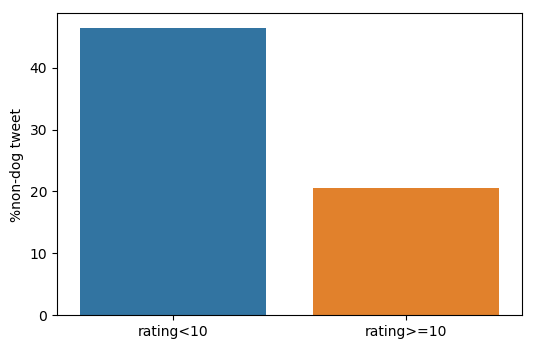

In [82]:
# Let's visualize the result here
plt.figure(dpi=100)
sns.barplot(x=['rating<10','rating>=10'],y=[46.47,20.60])
plt.ylabel('%non-dog tweet')
plt.show()

**So most likely, WeRateDogs rated images that are no dogs in them under 10.**

### Question 3

**What are the most popular dog breeds in this dataset?**

The measurement to evaluate the popularity here would be:

- overall rating of all tweets of the same breed
- total counts of all retweet of the same breed
- total counts of all favorite marks of the same breed

In [83]:
# create dataframe for this analysis
df_q3 = df.copy()

# remove missing prediction values by p1
df_q3 = df_q3.dropna(subset = ['p1_dog'])

# keep only images that are dogs predicted by p1
df_q3 = df_q3[df_q3.p1_dog == True]

In [84]:
# sort the popularity of each breed by three measurements
df_rate = df_q3.groupby('p1',as_index=False).sum().sort_values(by=['rating'],ascending=False)
df_retweet = df_q3.groupby('p1',as_index=False).sum().sort_values(by=['retweet_count'],ascending=False)
df_fav = df_q3.groupby('p1',as_index=False).sum().sort_values(by=['favorite_count'],ascending=False)

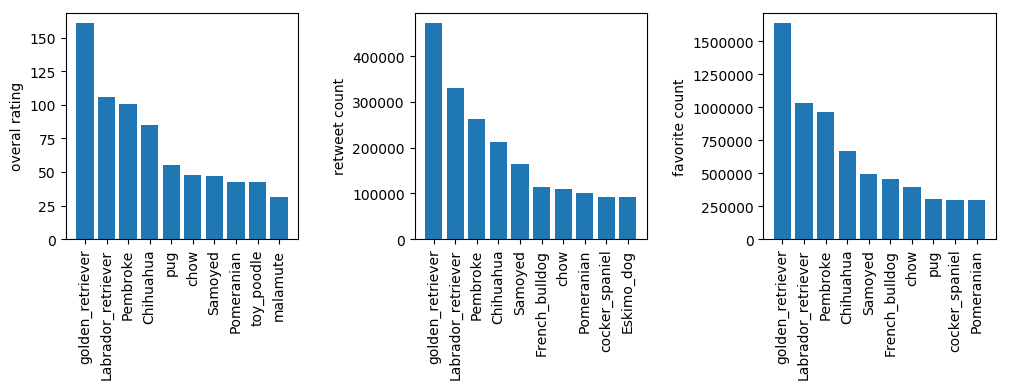

In [85]:
# create barplots to show top ten breeds by three measurements
f = plt.figure(figsize=(12,3),dpi=100)
plt.subplots_adjust(wspace=0.5)
f.add_subplot(131)
plt.bar(df_rate.p1[:10],df_rate.rating[:10])
plt.xticks(rotation=90)
plt.ylabel('overal rating')
f.add_subplot(132)
plt.bar(df_retweet.p1[:10],df_retweet.retweet_count[:10])
plt.xticks(rotation=90)
plt.ylabel('retweet count')
f.add_subplot(133)
plt.bar(df_fav.p1[:10],df_fav.favorite_count[:10])
plt.xticks(rotation=90)
plt.ylabel('favorite count')
plt.plot();

**With all three measurements including overall rating, retweet counts, and favorite counts, the results show that golden retriever, labrador retriever, and pembroke are the top three most popular dogs from this dataset.**

<a id='conclusions'></a>
## Conclusions

Data from WeRateDogs was gathered by query the Twitter API for each tweet using Python's Tweepy library. The datasets were assessed visually and programatically, cleaned in terms of quality and tidiness, and stored in prior to analysis.

From data analysis, some insights regarding WeRateDog dataset were found:

- WeRateDog rates dogs just for fun. The rating should not be the measurement to evaluate the popularity of dogs.
- Either retweet_count or favorite_count would give similar interpretation when using them to measure the popularity of the dogs.
- It is likely that WeRateDogs rated images that are no dogs in them under 10.
- Golden retriever, labrador retriever, and pembroke are the top three most popular dogs from this dataset.